## Basic Classification of a set of images of clothing
... Explain how the data set works as the 28x28 RGB values and general goals...

Based on the official [TF2 tutorial](https://www.tensorflow.org/tutorials/keras/basic_classification)

## Specificly install the current TF 2.0 alpha version
As new relaeases are delivered, these tutorial will be updated to reflect changes

In [72]:
!pip install tensorflow==2.0.0-alpha0

## Import dependencies and then make sure we have TF 2.0 alpha as our TF package

In [73]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


## Import the MNIST fashion data set
...Explain what train_images, train_labels and test_images, test_labels are...

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Set the training labels, mapping them to the class name
In general, Machine Learning algorithms prefer numeric values over text values.  To help improve performance, you want to create a numeric label that maps to the class (or specific text value). Using an array, each class has an index value.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data
Starting out, let's explore the shape of the datashape.  You'll see it has 60,000 images in the training set, with each having an image represtened as a 28x28 pixel image.

In [76]:
train_images.shape

(60000, 28, 28)

### See the label values
As seen from when we defined the class names, the label values are the index values of the array.

In [77]:
len(train_labels)

60000

## See the shape of the test images


In [78]:
test_images.shape

(10000, 28, 28)

### And we can see the test set contains 10,000 labels

In [79]:
len(test_labels)

10000

## Preporcess the data
Data must be preprocessed before training our network. ...EXPLAIN WHY?...

Memory space is really important when running big training sets.  Each pixel is an integer value from 0-255.  And with each image being 28x28, that's 784 individual data points per image.  Multiply that by 50K images, or 200K images.. 

A sneaky trick is to change the integrer values down to a floating point number between 0 and 1.0.  Turns out that takes up a lot less memory space and speeds up training in big data sets.  This process is called **normalization**.

Of course when we are down, we will want to reverse the process back to the original values if that is required.  More on this later.

We'll use the first image in the training images as an example.

<function matplotlib.pyplot.show>

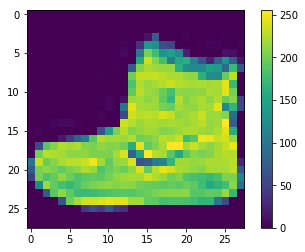

In [80]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

### Normalize the data
Using 255.0 to calculate down to a 0.0 - 1.0 value normalization.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

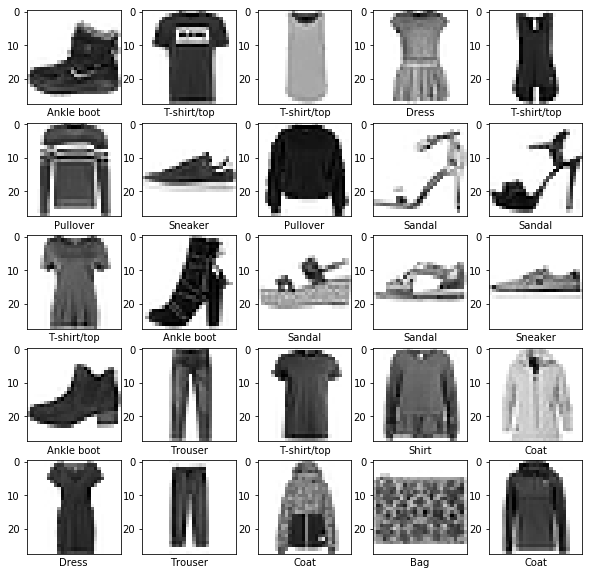

In [82]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model
Buiding the neural network requires configuring the layers of the model, then compiling the model.

### Setting up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.  

Most of deep learning consists of chaining together simple layers. Most layers, have parameters that are learned during training.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Layer types
*** brief description of core layers***

*** then describe Flatten and dense in more detail based on this context***

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model
Before training, the models needs a few more key settings.  During the compile stage we'll be adding a loss function, optimizer and metrics.

* Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* Optimizer —This is how the model is updated based on the data it sees and its loss function.
* Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

## Compile the model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [85]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4944 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3744 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3366 - accuracy: 0.8783
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3128 - accuracy: 0.8864
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2965 - accuracy: 0.8902


## Evaluate accuracy

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3810 - accuracy: 0.8656
Test accuracy:  0.8656


## Make predictions

In [0]:
predictions = model.predict(test_images)

In [88]:
predictions[0]

array([7.4868075e-07, 1.1004317e-08, 1.2085094e-08, 2.3332314e-10,
       4.2073734e-06, 6.0678269e-03, 5.7344084e-07, 8.5135169e-02,
       5.9878671e-06, 9.0878546e-01], dtype=float32)

In [89]:
np.argmax(predictions[0])

9

#### Graph this to look at the set of 10 channels

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Compare the 0th images, predictions, and prediction array

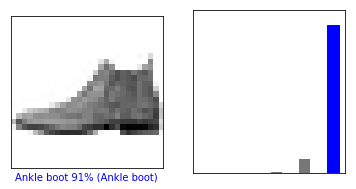

In [91]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

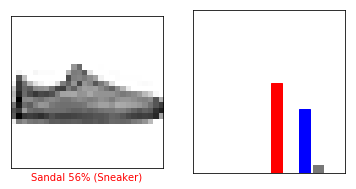

In [92]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

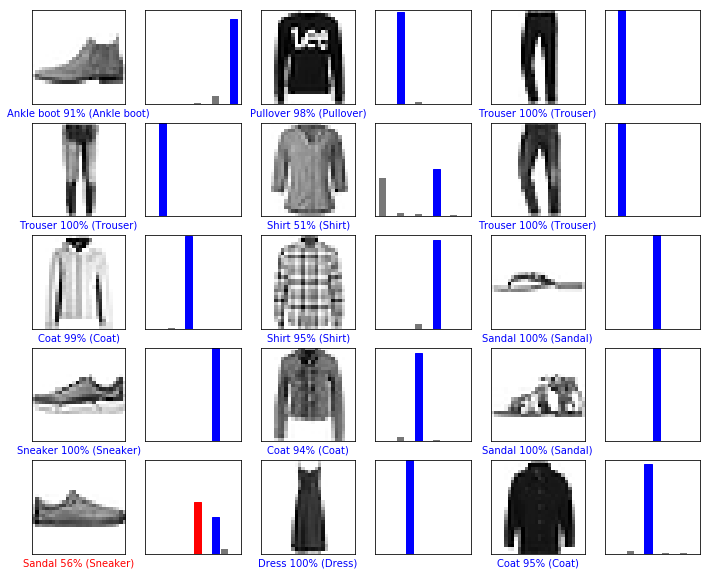

In [93]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [99]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


**tf.keras** models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [100]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Predict the image:

In [103]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.4867802e-07 1.1004297e-08 1.2085119e-08 2.3332358e-10 4.2073739e-06
  6.0678162e-03 5.7343880e-07 8.5135058e-02 5.9878566e-06 9.0878558e-01]]


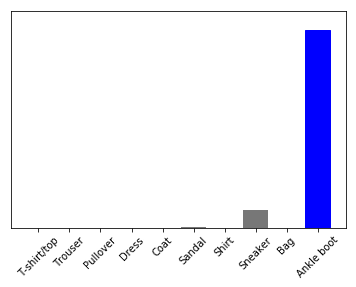

In [104]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

**model.predict** returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [106]:
np.argmax(predictions_single[0])

9